Computational Physics
Final Project 3
Riley Braselton

In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
# Potential energy
def potential(x,d,V0,x0):
    v = np.zeros_like(x)
    for i in range(x.size):
        if x[i] >= x0 and x[i] <=x0+d:
            v[i] = V0
    return v

In [3]:
# Initial Gaussian moving with momentum
def psi_initial(x, x0, sigma, k=350):
    return(((1/(np.pi*sigma**2))**(1/4))*
           (np.exp((-1/2)*((x -x0)**2/sigma**2)))*
           (np.exp(1j*k*(x - x0))) )

In [4]:
# Initital Conditions
x0 = 0.3
sigma = 0.05
k =350

# Time and position steps
dx = 5e-4
dt = 1e-7

# Grid Parameters
x = np.arange(0,1.5,dx)
t = np.arange(0, 2e-3, dt)

# Potential Barrier
x01 = 0.6
d = 5e-3
E = k**2 / 2 

# V0 will be varied from 0 to 2E in steps of .2E
V0 = 0.2*E

# Getting the potential energy
V = potential(x, d, V0, x01)

/Users/tjwilli/software/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


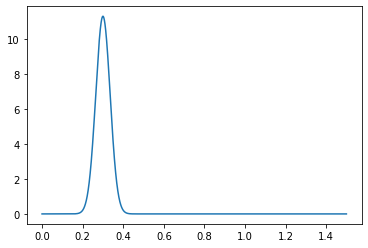

In [5]:
# Normalizing the psi equation
psi0 = psi_initial(x,x0,sigma)
plt.plot(x, np.conj(psi0)*psi0)

In [6]:
# Checking Normalization
integral = np.trapz(np.conj(psi0)*psi0,x)
print('The integral is', integral)

The integral is (1+0j)


In [7]:
# Getting matrix C
def C_matrix(v,dx,dt):
    Hdiag = np.diag(-1j * (1/dx**2 + v), 0)
    offdiag_elems = np.ones_like(x)[:-1] * 1j / 2 / dx**2
    Hdiaglow = np.diag(offdiag_elems, k=-1)
    Hdiaghi = np.diag(offdiag_elems, k =1)
    Hoffdiag = Hdiaglow + Hdiaghi
    H = Hdiag + Hoffdiag
    print(np.diag(H))
    
    iden = np.identity(x.size)
    A = iden - dt / 2 * H
    B = iden + dt / 2 * H
    
    Ainv = np.linalg.inv(A)
    C = np.matmul(Ainv, B)
    return C

In [8]:
# Printing matrix C
C = C_matrix(V, dx, dt)

[0.-4000000.j 0.-4000000.j 0.-4000000.j ... 0.-4000000.j 0.-4000000.j
 0.-4000000.j]


In [ ]:
# Psi equation many times
psi_t = []
psi_t.append(psi0)
for time in t:
    psi_t.append(np.dot(C, psi_t[-1]))

In [ ]:
# Graph of psi^2
prob = np.real(np.conj(psi_t[-1])*psi_t[-1])
plt.plot(x,prob)
plt.xlabel('x')
plt.ylabel('psi^2')
plt.title('x vs. psi^2 at V0 = 0.2E')

In [ ]:
# Total probability
totprob = np.trapz(prob,x)
print(totprob)

In [ ]:
for n in range(0, len(psi_t), 2000):
    t = dt *n 
    prob = np.conj(psi_t[n]) * psi_t[n]
    plt.plot(x, np.real(prob), label = 't=(:.2E)'.format(t))
plt.legend()

In [ ]:
xleft=[]
pleft =[]
for i in range(x.size):
    if x[i] <x01:
        xleft.append(x[i])
        pleft.append(prob[i])
        

In [ ]:
# Probability of reflection
p_reflect = np.trapz(pleft, xleft)
print( p_reflect, "Probability of reflection".format(p_reflect))


In [ ]:
# Probability of transmission
p_trans = np.trapz(prob[x>x01+d], x[x>x01+d])
print(p_trans, 'Probability of transmission'.format(p_trans))
